### Programming for Psychologists (2025/2026)
# Practical 4.1: Data visualization
Course coordination: Matthias Nau\
Teaching assistance: Anna van Harmelen & Camilla U. Enwereuzor \
Date: Nov 18, 2025

Welcome back! 🎉 Today we will be diving into data visualization. The goal of the following two practicals is for you to understand the basics of data visualization, and to create your own figures using your own data. In addition, we'll delve into learning how to use new libraries and reading the respective documentation.

Before working on your own data, we will go through a few basics together.

Make sure you have followed lecture 4 first. Done that? Then let's go! 😊

### Matplotlib 

Python doesn't have a lot of built-in functionality for data visualization. Fortunately, there is a huge library that is dedicated to creating visuals in Python: [Matplotlib](https://matplotlib.org/). It is fairly easy to use and has a great online documentation, including [tutorials](https://matplotlib.org/stable/tutorials/index.html), [examples](https://matplotlib.org/stable/gallery/index.html), and even a [quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html) for first-time users. In addition, many other visualization packages built on Matplotlib (e.g., Seaborn), so there are many reasons why you may want to learn how to use it.

Matplotlib is probably one of the most used packages in the daily life of psychologists. Whenever you want to get a sense of your data, plotting it with Matplotlib will be among the first steps.  In the following, we'll import a dataset, visualise it in a few different ways, and draw some **preliminary** conclusions based on that!

#### Getting started

Before using any library, we need to install it. Remember how to use ``pip install`` to do that? Open up your terminal, switch to the right conda environment, and then install it!

Once it is installed, open the matplotlib [quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html) and copy-paste the **first block of code** they show into the cell below!


In [ ]:
# Paste the code here
...

Great, you installed and imported Matplotlib! In addition, you imported another package called NumPy. And you have already opened the [quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html), which will help you with this notebook!

For plotting, Matplotlib creates an object called ``figure``, basically a blank canvas. A figure can contain one or more ``axes``, which are then used for the actual plotting. Check out the code below to better understand the distinction between figures and axes. 

In [ ]:
my_fig = plt.figure()

As you can see, it is returning something, namely a figure of size 640x480 with 0 axes on it. Because there are no axes drawn yet, we don't really see anything. Now, let's add an axis:

In [ ]:
my_fig = plt.figure()
my_fig.add_axes([0.75, 0.75, 0.75, 0.75])
# What happens when you change these numbers above? 
# What happens when you add another axis with different numbers? 
# Do you understand the difference between the figure object and axes?

Ha! Now we have something to look at. Now you can see that an axis is something you draw onto a figure, which will eventually host the visualization of your data. 

So far, we created the figure and axes separately. However, you can also create both at the same time using the function ``plt.subplots()``. 

In [ ]:
fig, ax = plt.subplots(1,1)

# 'fig' and 'ax' here are still just names that we chose, matching the standard (e.g., also what's used on matplotlib documentation). You could change these to anything you like.

The great thing about subplot is that it can also be used to add multiple axes into the same figure. Check this out! 

In [ ]:
fig, ax = plt.subplots(1,2)

Feel free to change the numbers in the code above and see what happens.

#### Intro to matplotlib
Now that we have a figure with axes, we can start adding data. Let's start with a quick overview of three important chart types: bar charts, line plots and scatter plots.

Let's start with a line plot. The code below creates an empty axis in a figure, and then adds a line to it! We'll use the ``plt.plot()`` function for that. You can find the documentation for the function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot), but we can also tell you that this function is easiest to use when the first two arguments provided are simply a list of data points for the x-values, and then a list of data points for the y-values. Like this:
```
plt.plot(x, y)
```

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot([1,2,3,4], [1,2,3,4])

A line, nice! Play around with the numbers a bit and see what's being plotted. 

Then, let's try a barplot next, using the same fake data! plt.bar(x,y) plots a bar of hight y and every position in x. 

In [ ]:
plt.bar([1,2,3,4], [1,2,3,4])

And finally, a scatter plot, which plots a ``Marker`` at every (x,y) position. In this case, the marker is a dot, but that can be changed. Again, play around with the numbers a bit and examine the effect on the plot. 

In [ ]:
plt.scatter([1,2,3,4], [1,2,3,4])

You can also write the code above like this:

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter([1,2,3,4], [1,2,3,4])

You might wonder why you would ever do one over the other: the first one is clearly easier, but the second one gives you the option to specify on which axis you want to draw any particular object. Especially if you're making complex figures, this can be really useful!

#### Matplotlib and Pandas (🐼)


Like we did last time, to use some real data we first need to import it from somewhere. There are *a lot* of different ways of doing that in Python. Here, we will import a simple .csv file, again using the [Pandas library](https://pandas.pydata.org/). Pandas and Matplotlib are also often used hand-in-hand.

You should have already installed Pandas last week - in case you haven't done so, go ahead and install it now!

Then, download the ``visual_search_data.csv`` file from our [Module 4 Canvas page](https://canvas.vu.nl/courses/83729/files/9422841?module_item_id=1646134) and put it in a folder on your computer. You will need to adjust the code below so that it links to that folder location.

In [ ]:
import pandas as pd

data = pd.read_csv('/Users/camillaucheomaenwereuzor/Desktop/Teaching/visual_search_data.csv', delimiter=';')
print(data)

Pandas is super powerful and does a lot of the boring work for you, like parsing the text file into its components. Now that we have our .csv data imported, we have a Pandas dataframe called "data". What is that? 

A ```Pandas dataframe``` is a new datatype. It contains tabular data (i.e., a table of data with a header for each column).

In our case, the variable "data" contains a table with *simulated* but realistic reaction times for a [visual search task](https://en.wikipedia.org/wiki/Visual_search) with two conditions (Feature search vs. Conjunctive search, google it if you want to know more!). 

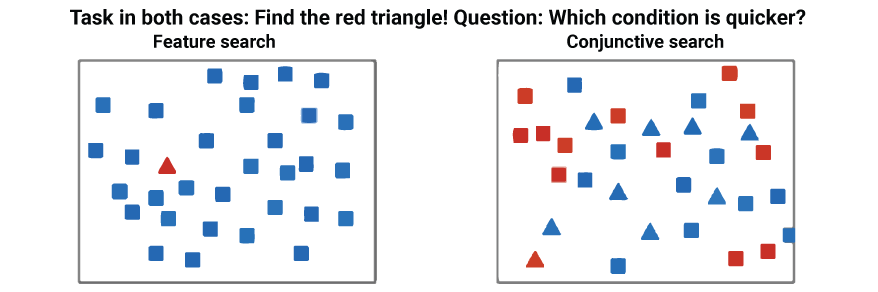

Here, our question is whether we see differences in reaction times for these two conditions. But how do we select data from this table?
To pick the data in the column "participant_id", you simply call data["participant_id"]. Calling data["feature_search"] picks the data with the header "feature_search" and so on.

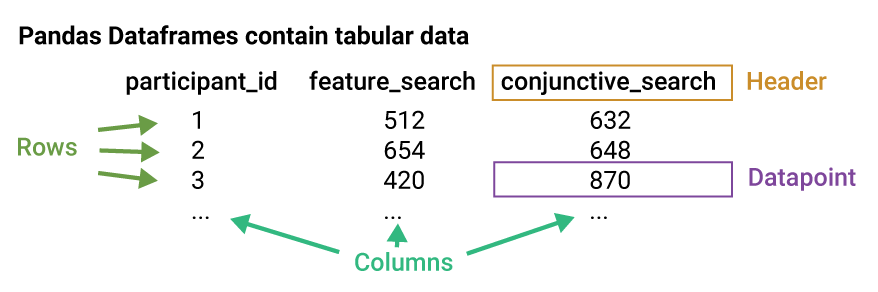

Let's take a first look at these data and compare the participants!

In [ ]:
# Make a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# Plot the average reaction time for each condition separately
ax1.axes.bar(data["participant_id"], data["feature_search"])
ax2.axes.bar(data["participant_id"], data["conjunctive_search"])

# Set titles for each subplot
ax1.set_title('Feature search')
ax2.set_title('Conjunctive search')

# Set the same y-axis limits for both subplots
ax1.set_ylim(ax2.get_ylim())

You might have noticed that we used slightly different syntax to make the bar charts here than before (see line 5 and 6 of the previous code cell). This is because we are now working with subplots that come with the great feature of being able to easily specify which axis a plot should be added to (e.g., by calling ``ax1.axes.bar(x,y)``). 

In addition, you will notice that we have already customized the figure a bit (e.g., by adding a title and adjusting the limit of the Y axis). We have added these customizations in a similar way as the data was added (e.g., ``ax1.axes.set_title('your_title')``). There are many more such customization options in matplotlib. Check out their documentation if you want to know more. 

**Your turn:**
Please change the colour of the bars for one of the conditions in the code above! Remember that google is your friend, that Matplotlib has a good online documention, that you have fellow students around you, and that you can always ask for help.

Once you are done, check out the plot you have made. Looks like some participants are slower than others, and in general it looks like everyone is a little slower on the conjunctive search, compared to the feature search, right? 

In [ ]:
# Copy your code above into this cell, and change the colour of one of the conditions.
...

To make inferences across tasks, we typically look at group-level data. Pandas dataframes have a few great built-in properties that we can leverage for this, for example, the built-in "[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)" function. It can be used to easily plot the average of some data over a requested axis (e.g., `data["feature_search"].mean()` ).

Using this built-in functionality, can you make a bar chart that showcases the average reaction times of all participants over the two different conditions?

Just so you know what you're working towards, here's what we're looking for:

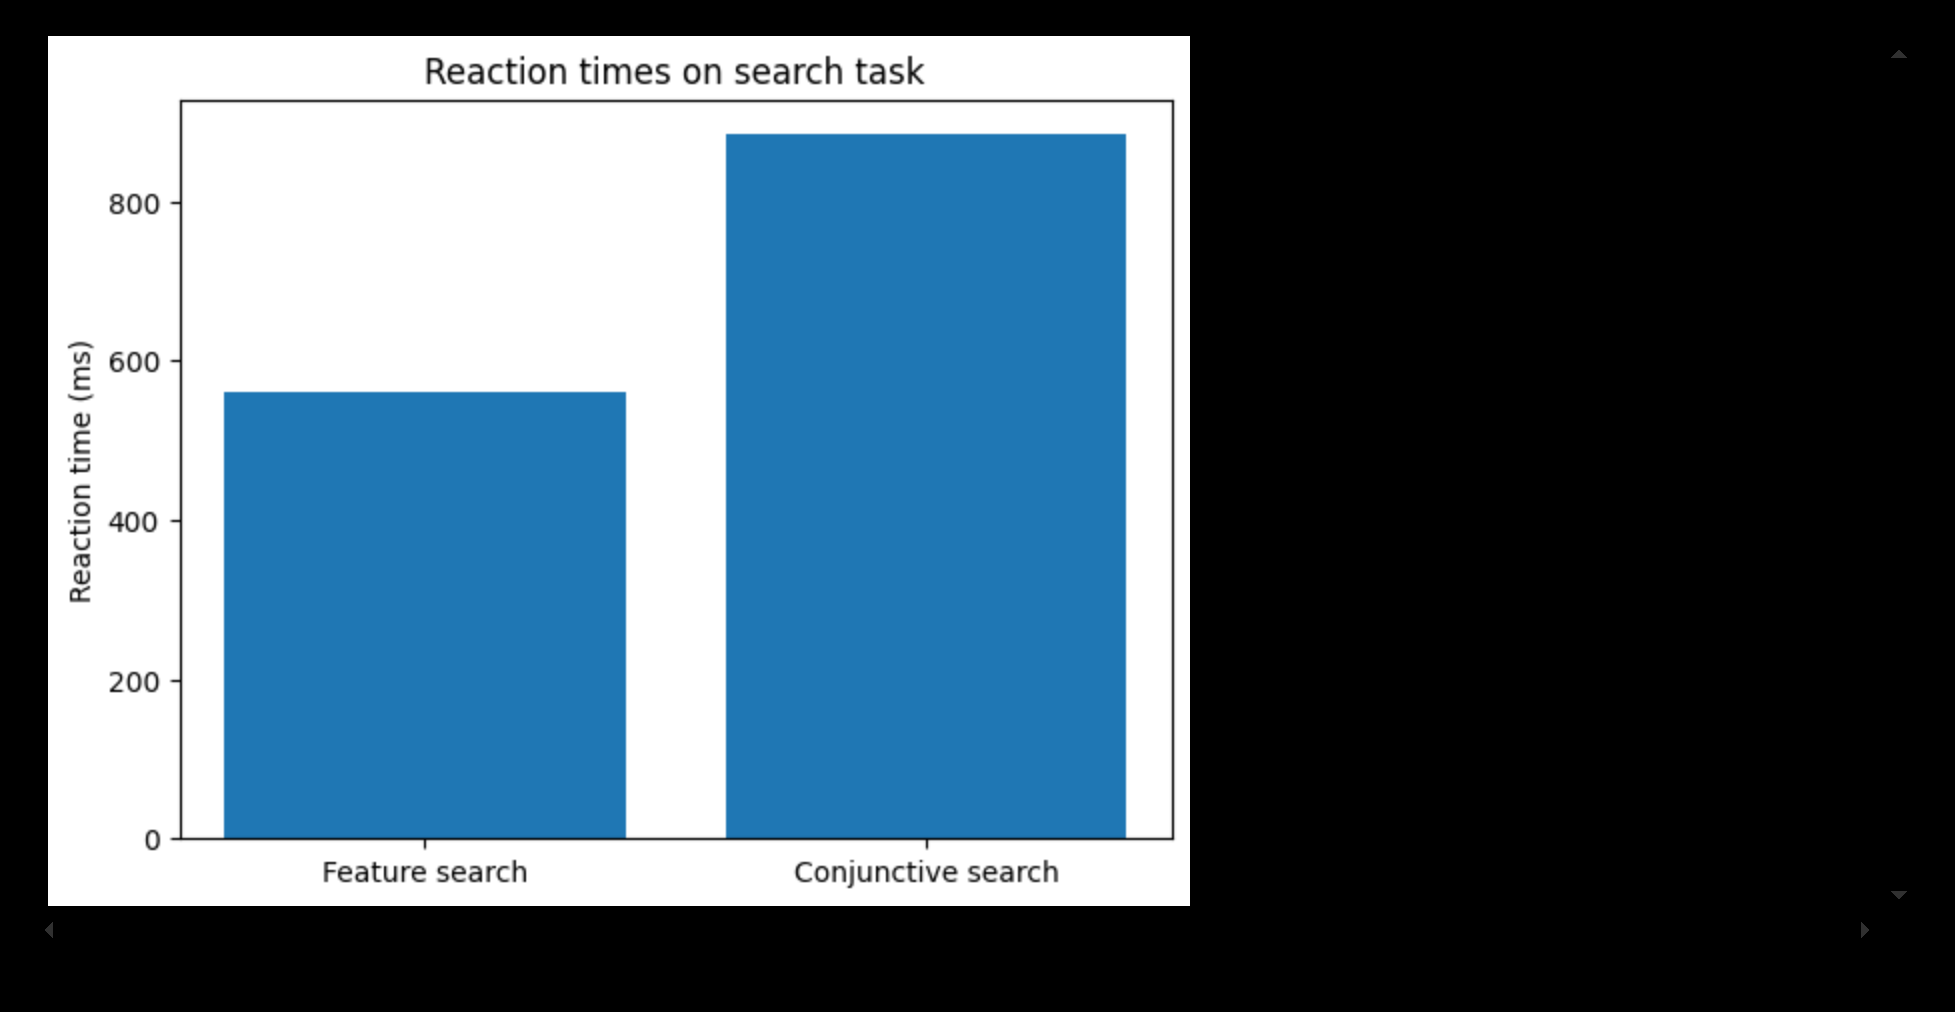

In [ ]:
# Make a bar chart of the average reaction times for each condition
...

# Add a title and a y-label
...


Alright! Looking good so far, but bar plots are really only interpretable if they show the variability in the data too. Therefore, we would like to add error bars to the figure, and also add lines of all the individual datapoints (where each participant is one line, connecting their two data points).

In [ ]:
# Make the original figure again
...

# Add error bars
...

# Add individual data points
...

If you are interested in seeing the spread of the difference in reaction time between the two conditions, a nice plot is the [violin plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html#matplotlib.axes.Axes.violinplot). Violine plots allow displaying not only an aggregate measure of the data mean and variability, but they even show the data distribution. This is the figure you'll be aiming for!

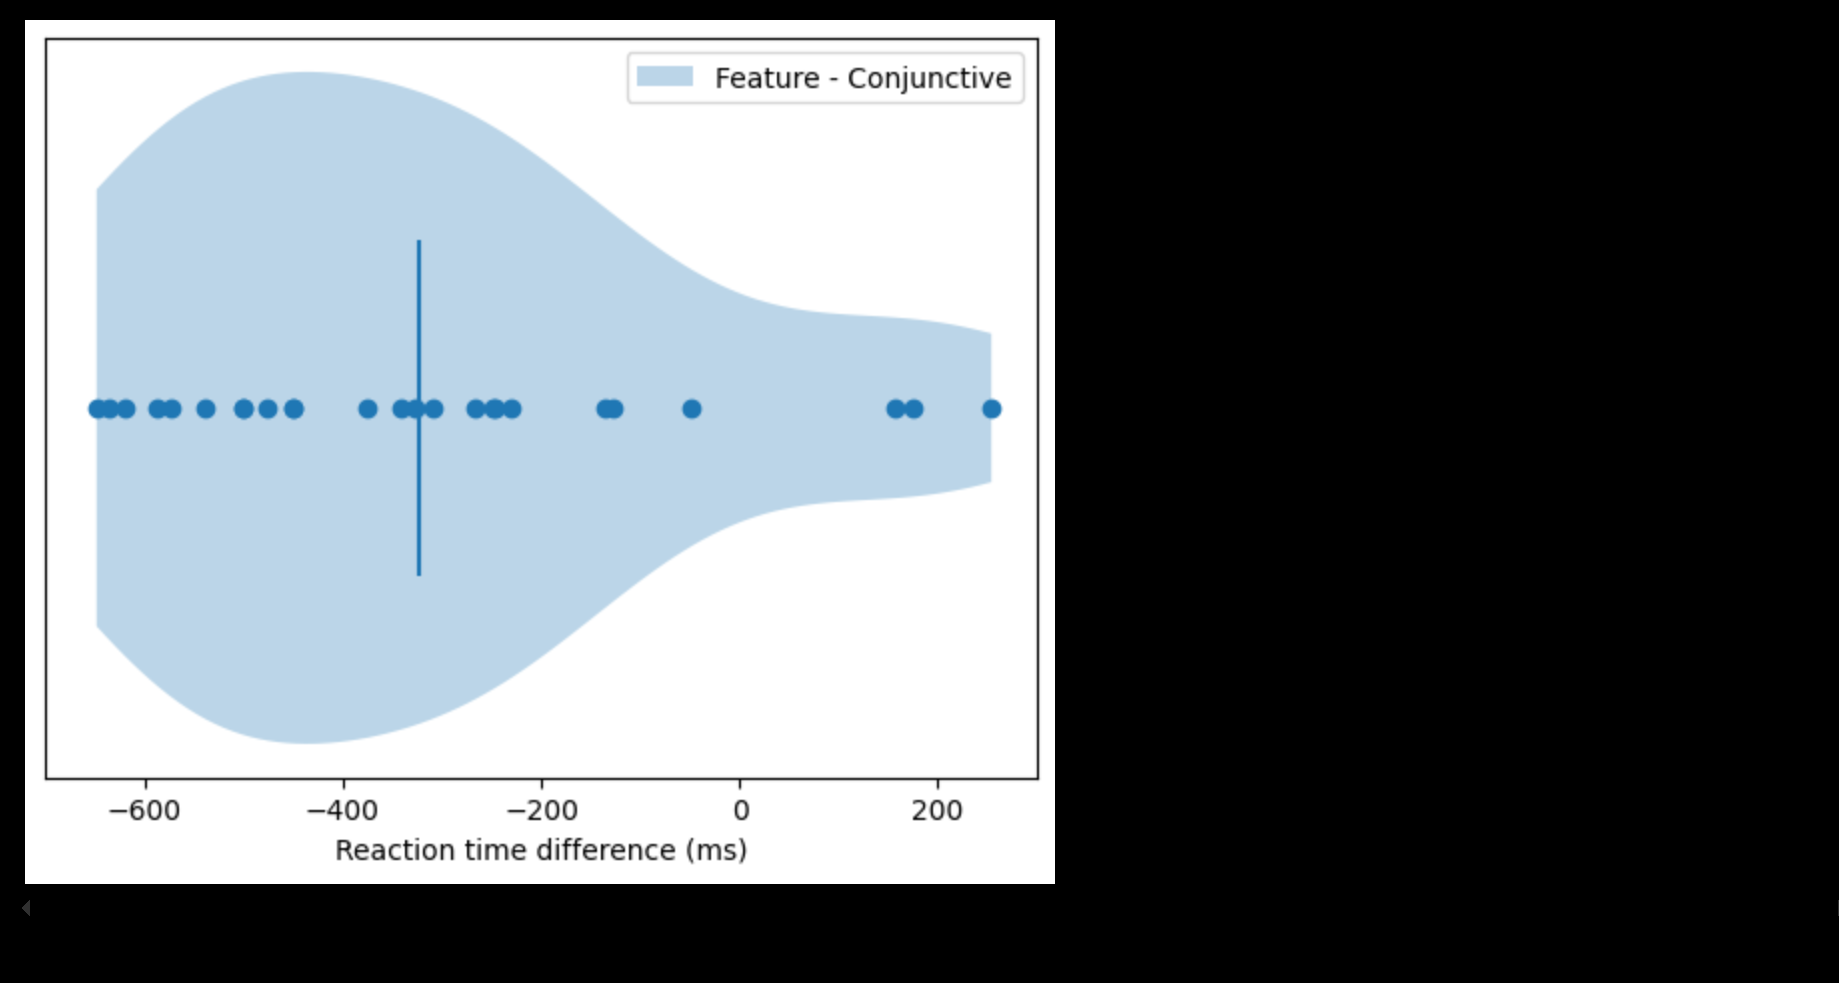

In [ ]:
# Make horizontal violin plot with line at the mean
...

# Add scatter of individual data points
...

# Remove yticks, add xlabel and legend
... 


Okay, we've looked at the data from quite a few different angles so far! What do you think? Can we draw any conclusions? Is there a difference, and if so: in which direction does this difference go? Is this as expected?

Your interpretation of the data:
...

#### Final plotting assignment: boxplot

We've seen quite a few different plot types so far, but do you also know the [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)? Your final assignment for today is to create a boxplot from the visual search data that shows the two conditions - using the documentation from matplotlib.

Make sure your plot contains labels for both the x- and y-axis, a title, a legend, and anything else to make it a fully fledged plot!

In [ ]:
# Create a boxplot of the reaction times for each condition
...

#### You did it! Congrats! See you next week!